## Importing Dependencies

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [227]:
df= pd.read_csv('/content/loan_dataset.csv')
df.sample(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
390,LP002255,Male,No,3+,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural,Y
357,LP002151,Male,Yes,1,Graduate,No,3875,0.0,67.0,360.0,1.0,Urban,N
558,LP002798,Male,Yes,0,Graduate,No,3887,2669.0,162.0,360.0,1.0,Semiurban,Y
295,LP001949,Male,Yes,3+,Graduate,NaN,4416,1250.0,110.0,360.0,1.0,Urban,Y
78,LP001263,Male,Yes,3+,Graduate,No,3167,4000.0,180.0,300.0,0.0,Semiurban,N
433,LP002387,Male,Yes,0,Graduate,No,2425,2340.0,143.0,360.0,1.0,Semiurban,Y
465,LP002494,Male,No,0,Graduate,No,6000,0.0,140.0,360.0,1.0,Rural,Y


In [228]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [229]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [230]:
df=df.dropna()
df.shape

(480, 13)

In [231]:
df['Dependents'].value_counts()


Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [232]:
df=df.replace({'Loan_Status':{'N':0,'Y':1}})


In [233]:
df = df.replace(to_replace='3+', value=4)

###Data Visualization

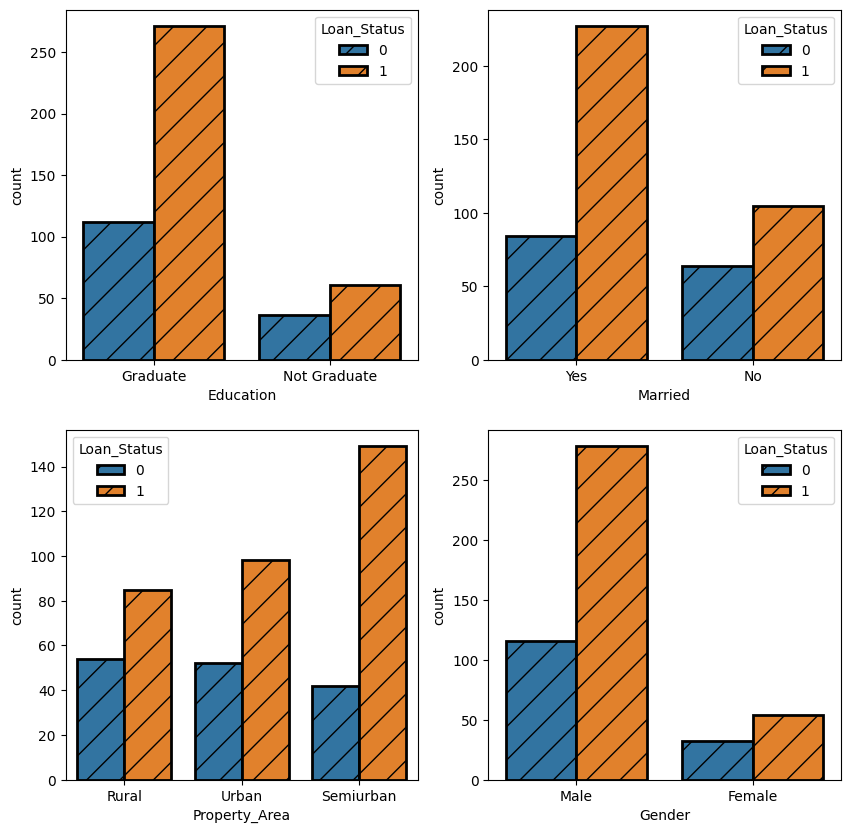

In [234]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x='Education',hue='Loan_Status',data=df,ec='black',lw=2,hatch='/')
plt.subplot(2,2,2)
sns.countplot(x='Married',hue='Loan_Status',data=df,ec='black',lw=2,hatch='/')
plt.subplot(2,2,3)
sns.countplot(x='Property_Area',hue='Loan_Status',data=df,ec='black',lw=2,hatch='/')
plt.subplot(2,2,4)
sns.countplot(x='Gender',hue='Loan_Status',data=df,ec='black',lw=2,hatch='/')
plt.show()

In [235]:
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [236]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

####Train Test Split and Model Training

In [237]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,stratify=Y, test_size=0.1, random_state=20)

In [238]:
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

##Testing Model Performance

In [239]:
train_pred=classifier.predict(X_train)
train_acc=accuracy_score(train_pred,Y_train)
print(f'Train accuracy:{train_acc*100:.2f}%')

Train accuracy:80.32%


In [240]:
test_pred=classifier.predict(X_test)
test_acc=accuracy_score(test_pred,Y_test)
print(f'Test accuracy:{test_acc*100:.2f}%')

Test accuracy:87.50%


##Prediction System

In [241]:
X_new = pd.DataFrame([X_test.iloc[4]], columns=X_test.columns)
pred = classifier.predict(X_new)
if pred[0] == 0:
    print("The Loan will be Denied")
else:
    print("The Loan will be Granted")

The Loan will be Denied
